In [16]:
# Python 수치해석 라이브러리
import numpy as np

# 회귀 분석용 테스트 데이터 만들어주는 라이브러리
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples = 500, n_features = 2,
    n_informative = 2, noise = 5,
    random_state = 0 # 완전 자율적으로!
)

print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [ ]:
# X, y = make_regression(
#     n_samples = 500, n_features = 2,
#     n_informative = 2, noise = 5,
#     random_state = 0 # 완전 자율적으로!
# )

help(make_regression)
# 다시
#랜덤한 ~~~

# 사용되는 features의 개수
# 이 사용된 features의 개수를 이용해서 linear 모델을 만들 것.
# y = ax + b

In [17]:
# 범위를 어디서부터 어디까지 받을 것인가 확인

print("output range = [%f %f]" %(min(y), max(y)))

output range = [-288.225754 271.270135]


In [18]:
# 만약 실행 안되면 pip install keras 해주면 됨.
from keras.models import Sequential
from keras.layers import Dense, Activation

In [19]:
def model_build():
    model = Sequential()
    
    model.add(Dense(16, input_dim = 2, activation = "relu"))
    model.add(Dense(8, activation = "relu"))
    model.add(Dense(1))
    
    # loss는 최소제곱오차를 사용했음
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    return model

In [20]:
from keras.wrappers.scikit_learn import KerasRegressor

In [21]:
YourModel = KerasRegressor(
    build_fn = model_build,
    epochs = 400,
    batch_size = 10,
    verbose = 1
)


# KeraseClassifier : 분류기
# KerasRegressor : 모델 생성기 (회귀분석 생성기)

In [22]:
# 폴딩해주기

from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)

In [23]:
from sklearn.model_selection import cross_val_score

results = cross_val_score(YourModel, X, y, cv = kf)

# 복잡한 모델이 아니어서 금방 실행 됨.
# Hyper Parameter는 모델이 별로 없으면 학습이 금방 됨.# 다시

Epoch 1/400
40/40 [==============================] - 0s 554us/step - loss: 10730.3301
Epoch 2/400
40/40 [==============================] - 0s 535us/step - loss: 10651.3076
Epoch 3/400
40/40 [==============================] - 0s 472us/step - loss: 10545.3877
Epoch 4/400
40/40 [==============================] - 0s 471us/step - loss: 10394.0322
Epoch 5/400
40/40 [==============================] - 0s 523us/step - loss: 10137.2168
Epoch 6/400
40/40 [==============================] - 0s 526us/step - loss: 9781.0459
Epoch 7/400
40/40 [==============================] - 0s 511us/step - loss: 9325.3418
Epoch 8/400
40/40 [==============================] - 0s 502us/step - loss: 8767.5898
Epoch 9/400
40/40 [==============================] - 0s 517us/step - loss: 8119.3257
Epoch 10/400
40/40 [==============================] - 0s 541us/step - loss: 7391.1274
Epoch 11/400
40/40 [==============================] - 0s 481us/step - loss: 6613.5049
Epoch 12/400
40/40 [==============================] - 0s 5

40/40 [==============================] - 0s 491us/step - loss: 113.1735
Epoch 98/400
40/40 [==============================] - 0s 508us/step - loss: 110.4172
Epoch 99/400
40/40 [==============================] - 0s 490us/step - loss: 108.0045
Epoch 100/400
40/40 [==============================] - 0s 566us/step - loss: 105.0117
Epoch 101/400
40/40 [==============================] - 0s 552us/step - loss: 102.4771
Epoch 102/400
40/40 [==============================] - 0s 535us/step - loss: 100.6856
Epoch 103/400
40/40 [==============================] - 0s 540us/step - loss: 97.8721
Epoch 104/400
40/40 [==============================] - 0s 508us/step - loss: 95.3065
Epoch 105/400
40/40 [==============================] - 0s 548us/step - loss: 93.4935
Epoch 106/400
40/40 [==============================] - 0s 546us/step - loss: 90.6201
Epoch 107/400
40/40 [==============================] - 0s 517us/step - loss: 88.3497
Epoch 108/400
40/40 [==============================] - 0s 511us/step - loss

40/40 [==============================] - 0s 579us/step - loss: 27.4378
Epoch 194/400
40/40 [==============================] - 0s 588us/step - loss: 27.2233
Epoch 195/400
40/40 [==============================] - 0s 594us/step - loss: 27.3772
Epoch 196/400
40/40 [==============================] - 0s 593us/step - loss: 27.2001
Epoch 197/400
40/40 [==============================] - 0s 625us/step - loss: 27.1525
Epoch 198/400
40/40 [==============================] - 0s 556us/step - loss: 27.8411
Epoch 199/400
40/40 [==============================] - 0s 592us/step - loss: 27.0770
Epoch 200/400
40/40 [==============================] - 0s 578us/step - loss: 26.9834
Epoch 201/400
40/40 [==============================] - 0s 627us/step - loss: 26.8665
Epoch 202/400
40/40 [==============================] - 0s 579us/step - loss: 26.9362
Epoch 203/400
40/40 [==============================] - 0s 577us/step - loss: 26.9866
Epoch 204/400
40/40 [==============================] - 0s 567us/step - loss: 27

40/40 [==============================] - 0s 539us/step - loss: 24.6900
Epoch 290/400
40/40 [==============================] - 0s 598us/step - loss: 24.8956
Epoch 291/400
40/40 [==============================] - 0s 562us/step - loss: 25.3967
Epoch 292/400
40/40 [==============================] - 0s 546us/step - loss: 24.8555
Epoch 293/400
40/40 [==============================] - 0s 579us/step - loss: 24.9961
Epoch 294/400
40/40 [==============================] - 0s 548us/step - loss: 24.8533
Epoch 295/400
40/40 [==============================] - 0s 584us/step - loss: 25.2530
Epoch 296/400
40/40 [==============================] - 0s 565us/step - loss: 25.0748
Epoch 297/400
40/40 [==============================] - 0s 581us/step - loss: 25.0148
Epoch 298/400
40/40 [==============================] - 0s 559us/step - loss: 24.8902
Epoch 299/400
40/40 [==============================] - 0s 549us/step - loss: 24.7542
Epoch 300/400
40/40 [==============================] - 0s 643us/step - loss: 24

40/40 [==============================] - 0s 571us/step - loss: 24.2803
Epoch 386/400
40/40 [==============================] - 0s 554us/step - loss: 24.1207
Epoch 387/400
40/40 [==============================] - 0s 587us/step - loss: 24.3821
Epoch 388/400
40/40 [==============================] - 0s 556us/step - loss: 24.1305
Epoch 389/400
40/40 [==============================] - 0s 564us/step - loss: 24.3858
Epoch 390/400
40/40 [==============================] - 0s 602us/step - loss: 24.0673
Epoch 391/400
40/40 [==============================] - 0s 592us/step - loss: 24.6747
Epoch 392/400
40/40 [==============================] - 0s 559us/step - loss: 24.3371
Epoch 393/400
40/40 [==============================] - 0s 581us/step - loss: 24.2352
Epoch 394/400
40/40 [==============================] - 0s 584us/step - loss: 24.5620
Epoch 395/400
40/40 [==============================] - 0s 552us/step - loss: 24.2345
Epoch 396/400
40/40 [==============================] - 0s 543us/step - loss: 24

40/40 [==============================] - 0s 535us/step - loss: 197.4037
Epoch 81/400
40/40 [==============================] - 0s 465us/step - loss: 196.9621
Epoch 82/400
40/40 [==============================] - 0s 523us/step - loss: 196.3172
Epoch 83/400
40/40 [==============================] - 0s 481us/step - loss: 195.3359
Epoch 84/400
40/40 [==============================] - 0s 777us/step - loss: 193.8410
Epoch 85/400
40/40 [==============================] - 0s 483us/step - loss: 192.3909
Epoch 86/400
40/40 [==============================] - 0s 499us/step - loss: 192.5629
Epoch 87/400
40/40 [==============================] - 0s 531us/step - loss: 190.0544
Epoch 88/400
40/40 [==============================] - 0s 536us/step - loss: 188.3201
Epoch 89/400
40/40 [==============================] - 0s 479us/step - loss: 187.6539
Epoch 90/400
40/40 [==============================] - 0s 560us/step - loss: 186.1664
Epoch 91/400
40/40 [==============================] - 0s 495us/step - loss: 18

40/40 [==============================] - 0s 491us/step - loss: 47.8527
Epoch 177/400
40/40 [==============================] - 0s 488us/step - loss: 46.3977
Epoch 178/400
40/40 [==============================] - 0s 525us/step - loss: 45.4324
Epoch 179/400
40/40 [==============================] - 0s 499us/step - loss: 44.4055
Epoch 180/400
40/40 [==============================] - 0s 513us/step - loss: 43.5830
Epoch 181/400
40/40 [==============================] - 0s 500us/step - loss: 42.4240
Epoch 182/400
40/40 [==============================] - 0s 541us/step - loss: 41.4971
Epoch 183/400
40/40 [==============================] - 0s 495us/step - loss: 40.8251
Epoch 184/400
40/40 [==============================] - 0s 604us/step - loss: 39.8288
Epoch 185/400
40/40 [==============================] - 0s 492us/step - loss: 39.3421
Epoch 186/400
40/40 [==============================] - 0s 484us/step - loss: 38.7237
Epoch 187/400
40/40 [==============================] - 0s 471us/step - loss: 37

40/40 [==============================] - 0s 503us/step - loss: 25.0169
Epoch 273/400
40/40 [==============================] - 0s 489us/step - loss: 24.3543
Epoch 274/400
40/40 [==============================] - 0s 589us/step - loss: 24.3457
Epoch 275/400
40/40 [==============================] - 0s 504us/step - loss: 24.3866
Epoch 276/400
40/40 [==============================] - 0s 503us/step - loss: 24.6605
Epoch 277/400
40/40 [==============================] - 0s 543us/step - loss: 24.4371
Epoch 278/400
40/40 [==============================] - 0s 498us/step - loss: 24.5201
Epoch 279/400
40/40 [==============================] - 0s 494us/step - loss: 24.2789
Epoch 280/400
40/40 [==============================] - 0s 491us/step - loss: 24.2723
Epoch 281/400
40/40 [==============================] - 0s 496us/step - loss: 24.3046
Epoch 282/400
40/40 [==============================] - 0s 496us/step - loss: 24.2838
Epoch 283/400
40/40 [==============================] - 0s 498us/step - loss: 24

40/40 [==============================] - 0s 491us/step - loss: 23.6714
Epoch 369/400
40/40 [==============================] - 0s 458us/step - loss: 23.5945
Epoch 370/400
40/40 [==============================] - 0s 497us/step - loss: 23.8017
Epoch 371/400
40/40 [==============================] - 0s 480us/step - loss: 23.8139
Epoch 372/400
40/40 [==============================] - 0s 458us/step - loss: 23.9414
Epoch 373/400
40/40 [==============================] - 0s 522us/step - loss: 23.6001
Epoch 374/400
40/40 [==============================] - 0s 496us/step - loss: 23.5457
Epoch 375/400
40/40 [==============================] - 0s 508us/step - loss: 23.4034
Epoch 376/400
40/40 [==============================] - 0s 513us/step - loss: 23.6713
Epoch 377/400
40/40 [==============================] - 0s 514us/step - loss: 23.6031
Epoch 378/400
40/40 [==============================] - 0s 487us/step - loss: 24.1597
Epoch 379/400
40/40 [==============================] - 0s 577us/step - loss: 23

40/40 [==============================] - 0s 506us/step - loss: 223.5049
Epoch 64/400
40/40 [==============================] - 0s 488us/step - loss: 221.7063
Epoch 65/400
40/40 [==============================] - 0s 494us/step - loss: 220.2972
Epoch 66/400
40/40 [==============================] - 0s 485us/step - loss: 219.2580
Epoch 67/400
40/40 [==============================] - 0s 495us/step - loss: 219.0096
Epoch 68/400
40/40 [==============================] - 0s 509us/step - loss: 217.5313
Epoch 69/400
40/40 [==============================] - 0s 515us/step - loss: 216.4354
Epoch 70/400
40/40 [==============================] - 0s 544us/step - loss: 214.1777
Epoch 71/400
40/40 [==============================] - 0s 548us/step - loss: 213.1239
Epoch 72/400
40/40 [==============================] - 0s 475us/step - loss: 211.9986
Epoch 73/400
40/40 [==============================] - 0s 485us/step - loss: 210.5146
Epoch 74/400
40/40 [==============================] - 0s 505us/step - loss: 20

40/40 [==============================] - 0s 787us/step - loss: 49.1154
Epoch 160/400
40/40 [==============================] - 0s 784us/step - loss: 48.0315
Epoch 161/400
40/40 [==============================] - 0s 782us/step - loss: 47.1233
Epoch 162/400
40/40 [==============================] - 0s 752us/step - loss: 45.9453
Epoch 163/400
40/40 [==============================] - 0s 862us/step - loss: 44.7611
Epoch 164/400
40/40 [==============================] - 0s 838us/step - loss: 44.2801
Epoch 165/400
40/40 [==============================] - 0s 769us/step - loss: 43.3525
Epoch 166/400
40/40 [==============================] - 0s 793us/step - loss: 42.5128
Epoch 167/400
40/40 [==============================] - 0s 774us/step - loss: 41.7420
Epoch 168/400
40/40 [==============================] - 0s 771us/step - loss: 41.0323
Epoch 169/400
40/40 [==============================] - 0s 765us/step - loss: 40.4527
Epoch 170/400
40/40 [==============================] - 0s 765us/step - loss: 40

40/40 [==============================] - 0s 473us/step - loss: 25.7979
Epoch 256/400
40/40 [==============================] - 0s 488us/step - loss: 25.8565
Epoch 257/400
40/40 [==============================] - 0s 455us/step - loss: 26.0105
Epoch 258/400
40/40 [==============================] - 0s 492us/step - loss: 25.8786
Epoch 259/400
40/40 [==============================] - 0s 473us/step - loss: 25.9222
Epoch 260/400
40/40 [==============================] - 0s 521us/step - loss: 26.0186
Epoch 261/400
40/40 [==============================] - 0s 501us/step - loss: 25.6622
Epoch 262/400
40/40 [==============================] - 0s 471us/step - loss: 25.7496
Epoch 263/400
40/40 [==============================] - 0s 473us/step - loss: 25.4173
Epoch 264/400
40/40 [==============================] - 0s 470us/step - loss: 25.8214
Epoch 265/400
40/40 [==============================] - 0s 667us/step - loss: 26.1314
Epoch 266/400
40/40 [==============================] - 0s 532us/step - loss: 25

40/40 [==============================] - 0s 483us/step - loss: 23.9948
Epoch 352/400
40/40 [==============================] - 0s 566us/step - loss: 23.9228
Epoch 353/400
40/40 [==============================] - 0s 494us/step - loss: 24.4462
Epoch 354/400
40/40 [==============================] - 0s 506us/step - loss: 24.0470
Epoch 355/400
40/40 [==============================] - 0s 500us/step - loss: 23.6692
Epoch 356/400
40/40 [==============================] - 0s 531us/step - loss: 23.8890
Epoch 357/400
40/40 [==============================] - 0s 521us/step - loss: 24.6098
Epoch 358/400
40/40 [==============================] - 0s 729us/step - loss: 23.6645
Epoch 359/400
40/40 [==============================] - 0s 621us/step - loss: 23.7410
Epoch 360/400
40/40 [==============================] - 0s 600us/step - loss: 23.9070
Epoch 361/400
40/40 [==============================] - 0s 500us/step - loss: 23.8606
Epoch 362/400
40/40 [==============================] - 0s 472us/step - loss: 24

40/40 [==============================] - 0s 506us/step - loss: 209.2089
Epoch 47/400
40/40 [==============================] - 0s 511us/step - loss: 207.1241
Epoch 48/400
40/40 [==============================] - 0s 516us/step - loss: 205.5808
Epoch 49/400
40/40 [==============================] - 0s 511us/step - loss: 205.2183
Epoch 50/400
40/40 [==============================] - 0s 520us/step - loss: 202.7263
Epoch 51/400
40/40 [==============================] - 0s 555us/step - loss: 200.9941
Epoch 52/400
40/40 [==============================] - 0s 594us/step - loss: 199.6521
Epoch 53/400
40/40 [==============================] - 0s 514us/step - loss: 197.6294
Epoch 54/400
40/40 [==============================] - 0s 582us/step - loss: 195.8671
Epoch 55/400
40/40 [==============================] - 0s 494us/step - loss: 195.2173
Epoch 56/400
40/40 [==============================] - 0s 496us/step - loss: 192.0728
Epoch 57/400
40/40 [==============================] - 0s 489us/step - loss: 19

40/40 [==============================] - 0s 608us/step - loss: 32.3162
Epoch 143/400
40/40 [==============================] - 0s 534us/step - loss: 32.4286
Epoch 144/400
40/40 [==============================] - 0s 512us/step - loss: 31.6221
Epoch 145/400
40/40 [==============================] - 0s 539us/step - loss: 31.2353
Epoch 146/400
40/40 [==============================] - 0s 479us/step - loss: 30.8592
Epoch 147/400
40/40 [==============================] - 0s 511us/step - loss: 30.3907
Epoch 148/400
40/40 [==============================] - 0s 506us/step - loss: 30.1645
Epoch 149/400
40/40 [==============================] - 0s 491us/step - loss: 29.6775
Epoch 150/400
40/40 [==============================] - 0s 516us/step - loss: 29.4538
Epoch 151/400
40/40 [==============================] - 0s 502us/step - loss: 29.0094
Epoch 152/400
40/40 [==============================] - 0s 499us/step - loss: 28.7116
Epoch 153/400
40/40 [==============================] - 0s 521us/step - loss: 28

40/40 [==============================] - 0s 492us/step - loss: 22.9536
Epoch 239/400
40/40 [==============================] - 0s 504us/step - loss: 22.9470
Epoch 240/400
40/40 [==============================] - 0s 517us/step - loss: 22.7162
Epoch 241/400
40/40 [==============================] - 0s 540us/step - loss: 22.7380
Epoch 242/400
40/40 [==============================] - 0s 558us/step - loss: 22.6473
Epoch 243/400
40/40 [==============================] - 0s 529us/step - loss: 23.0763
Epoch 244/400
40/40 [==============================] - 0s 464us/step - loss: 22.8377
Epoch 245/400
40/40 [==============================] - 0s 521us/step - loss: 22.4945
Epoch 246/400
40/40 [==============================] - 0s 491us/step - loss: 22.4812
Epoch 247/400
40/40 [==============================] - 0s 486us/step - loss: 22.6259
Epoch 248/400
40/40 [==============================] - 0s 510us/step - loss: 22.4805
Epoch 249/400
40/40 [==============================] - 0s 491us/step - loss: 22

40/40 [==============================] - 0s 495us/step - loss: 21.4760
Epoch 335/400
40/40 [==============================] - 0s 463us/step - loss: 21.4487
Epoch 336/400
40/40 [==============================] - 0s 476us/step - loss: 21.1912
Epoch 337/400
40/40 [==============================] - 0s 496us/step - loss: 21.0893
Epoch 338/400
40/40 [==============================] - 0s 536us/step - loss: 21.2784
Epoch 339/400
40/40 [==============================] - 0s 514us/step - loss: 21.4100
Epoch 340/400
40/40 [==============================] - 0s 511us/step - loss: 21.4768
Epoch 341/400
40/40 [==============================] - 0s 543us/step - loss: 21.1966
Epoch 342/400
40/40 [==============================] - 0s 491us/step - loss: 21.0875
Epoch 343/400
40/40 [==============================] - 0s 498us/step - loss: 21.2818
Epoch 344/400
40/40 [==============================] - 0s 493us/step - loss: 21.2184
Epoch 345/400
40/40 [==============================] - 0s 553us/step - loss: 21

40/40 [==============================] - 0s 488us/step - loss: 232.2696
Epoch 30/400
40/40 [==============================] - 0s 498us/step - loss: 225.2807
Epoch 31/400
40/40 [==============================] - 0s 558us/step - loss: 221.1144
Epoch 32/400
40/40 [==============================] - 0s 491us/step - loss: 217.7556
Epoch 33/400
40/40 [==============================] - 0s 488us/step - loss: 217.3222
Epoch 34/400
40/40 [==============================] - 0s 506us/step - loss: 214.4512
Epoch 35/400
40/40 [==============================] - 0s 526us/step - loss: 213.3525
Epoch 36/400
40/40 [==============================] - 0s 484us/step - loss: 211.1758
Epoch 37/400
40/40 [==============================] - 0s 534us/step - loss: 209.4715
Epoch 38/400
40/40 [==============================] - 0s 496us/step - loss: 209.3406
Epoch 39/400
40/40 [==============================] - 0s 534us/step - loss: 208.0415
Epoch 40/400
40/40 [==============================] - 0s 487us/step - loss: 20

40/40 [==============================] - 0s 507us/step - loss: 47.9507
Epoch 126/400
40/40 [==============================] - 0s 504us/step - loss: 46.9149
Epoch 127/400
40/40 [==============================] - 0s 485us/step - loss: 45.9172
Epoch 128/400
40/40 [==============================] - 0s 566us/step - loss: 44.7559
Epoch 129/400
40/40 [==============================] - 0s 498us/step - loss: 43.6849
Epoch 130/400
40/40 [==============================] - 0s 569us/step - loss: 42.5351
Epoch 131/400
40/40 [==============================] - 0s 559us/step - loss: 41.3700
Epoch 132/400
40/40 [==============================] - 0s 535us/step - loss: 40.6000
Epoch 133/400
40/40 [==============================] - 0s 506us/step - loss: 39.9632
Epoch 134/400
40/40 [==============================] - 0s 504us/step - loss: 38.6459
Epoch 135/400
40/40 [==============================] - 0s 483us/step - loss: 38.1084
Epoch 136/400
40/40 [==============================] - 0s 467us/step - loss: 37

40/40 [==============================] - 0s 518us/step - loss: 22.6155
Epoch 222/400
40/40 [==============================] - 0s 488us/step - loss: 22.5416
Epoch 223/400
40/40 [==============================] - 0s 506us/step - loss: 22.8416
Epoch 224/400
40/40 [==============================] - 0s 528us/step - loss: 22.6573
Epoch 225/400
40/40 [==============================] - 0s 538us/step - loss: 22.5773
Epoch 226/400
40/40 [==============================] - 0s 500us/step - loss: 22.8579
Epoch 227/400
40/40 [==============================] - 0s 480us/step - loss: 22.6202
Epoch 228/400
40/40 [==============================] - 0s 517us/step - loss: 22.3212
Epoch 229/400
40/40 [==============================] - 0s 490us/step - loss: 22.4470
Epoch 230/400
40/40 [==============================] - 0s 506us/step - loss: 22.3721
Epoch 231/400
40/40 [==============================] - 0s 516us/step - loss: 22.7589
Epoch 232/400
40/40 [==============================] - 0s 512us/step - loss: 22

40/40 [==============================] - 0s 498us/step - loss: 20.9362
Epoch 318/400
40/40 [==============================] - 0s 600us/step - loss: 20.8573
Epoch 319/400
40/40 [==============================] - 0s 479us/step - loss: 21.2033
Epoch 320/400
40/40 [==============================] - 0s 488us/step - loss: 20.9969
Epoch 321/400
40/40 [==============================] - 0s 497us/step - loss: 21.2395
Epoch 322/400
40/40 [==============================] - 0s 512us/step - loss: 20.8409
Epoch 323/400
40/40 [==============================] - 0s 494us/step - loss: 20.6130
Epoch 324/400
40/40 [==============================] - 0s 490us/step - loss: 20.8843
Epoch 325/400
40/40 [==============================] - 0s 527us/step - loss: 21.2405
Epoch 326/400
40/40 [==============================] - 0s 491us/step - loss: 20.9896
Epoch 327/400
40/40 [==============================] - 0s 512us/step - loss: 21.0058
Epoch 328/400
40/40 [==============================] - 0s 585us/step - loss: 20

In [24]:
print("Final Cross Validation Loss:", abs(results.mean()))

# results.mean() : 전체 결과의 평균 (전체 loss의 평균값을 구한 것!)
# 최종적으로 cross Validation Loss가 약 24로 상당히 큼.

# 점점 가면서 loss를 줄여가면서 과적합을 최소화하는 방법을 살펴볼 것임.
# 우선은 아직 regulizer는 들어가지 않았음.

Final Cross Validation Loss: 24.170866012573242


In [28]:
import pandas as pd

X = pd.read_csv(
    "Applied-Deep-Learning-with-Keras/Lesson02/bank_data_feats.csv", index_col = 0
)
y = pd.read_csv(
    "Applied-Deep-Learning-with-Keras/Lesson02/bank_data_target.csv", index_col = 0
)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0 # 완전 랜덤하게
)

In [31]:
seed = 1
np.random.seed(seed)

In [32]:
print(X.shape)

(4521, 32)


In [33]:
model = Sequential()
model.add(Dense(8, input_dim = 32,activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy'] # 주로 정확성을 보겠습니다. 라는 의미
)

In [34]:
trainRes = model.fit(
    X_train, y_train, 
    batch_size = 10, 
    epochs = 400, 
    validation_data = (X_test, y_test), # 교차검증 이 두개를 하겠다.
    verbose = 0
)

# input size가 좀 많아서 생각보다 오래 걸림.

Best Accuracy = 0.8769344091415405


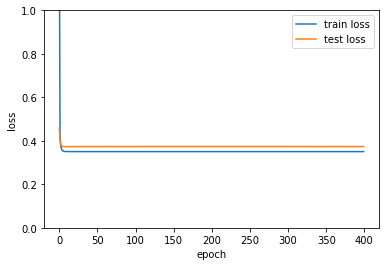

In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy =", max(trainRes.history['val_accuracy']))

# 그래프 봤을 때 별 차이 없어보임
# 학습을 많이해도 약 5번까지는 loss데이터가 확 줄어들다가 그 이상부터는 일정한 loss
# 최고의 확률이 0.87임을 확인할 수 있음.

In [38]:
# regularizers(정규화) 하기

# l1은 +,-가 교차될 수 있어서 오차 없다고 판정할 수 있어서
# 보통 l2를 쓸 것!
from keras.regularizers import l2

model = Sequential()
model.add(Dense(32, input_dim = 32, activation = 'tanh', # relu 쓰니까 결과 안좋은 것 같아서 tanh로 써보기!
                
                # 실질적으로 노이즈는 학습하지 않게 만들어주며
                # 동시에 반응성도 같이 올려주는 역할로 사용된다.
                # (정규화 과정을 상기하도록 한다!)
                # 정규화를 하면 쓸데없는 가중치를 다 쳐내니까 연산속도가 굉장히 빨라짐.
                # kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01)
                kernel_regularizer = l2(0.01)))


model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [39]:
trainRes = model.fit(
    X_train, y_train, 
    batch_size = 10, 
    epochs = 300, 
    validation_data = (X_test, y_test),
    verbose = 0
)

Best Accuracy = 0.8769344091415405


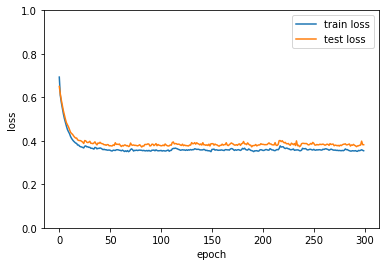

In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy =", max(trainRes.history['val_accuracy']))


# 제대로 된 결과가 나오기 시작함.
# 학습을 새롭게 하고 있는게 있으니까 loss를 많이 하는 것을 볼 수 있음.

# 지글지글 하는 모습이 기존에 있던 것과 좀 많이 다른 것이 들어 왔을 때는 뾰족하게 올라가게 됨
# 이것이 기존의 형태와는 다른 정보다라는 것을 감지하는 것!!!

# 정보가 이렇게 지글지글하게 나와야 얘가 진짜 loss가 있다는 것을 판단하고 뭔가를 할 수 있구나라는 것을 감지할 수 있음.

# 이부분이 실질적으로 밑에 식임!
# kernel_regularizer = l2(0.01)
# 이것을 통해서 잡음을 제거하면서도 loss에 대한 것을 감지를 잘할 수 있는 형태로 만들어 준 것!


# 처음 구간에서 내가 알고 있는 정보와는 많이 다른 애들이 있는데?하고 판정을 해서
# 노이즈에 대한 것은 걸렀으니까 다르다는 것을 알고 있음 (급 하락하는 구간)

In [41]:
# kernel_regularizer = l2(0.01)의 효과를 보고 싶다면 
# regularizer를 빼고 확인해보기!

from keras.regularizers import l2

model = Sequential()
model.add(Dense(32, input_dim = 32, activation = 'tanh'))

model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [42]:
trainRes = model.fit(
    X_train, y_train, 
    batch_size = 10, 
    epochs = 300, 
    validation_data = (X_test, y_test),
    verbose = 0
)

Best Accuracy = 0.8776713609695435


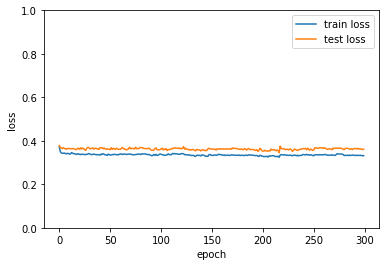

In [43]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy =", max(trainRes.history['val_accuracy']))

# 확실히 train, test loss가 위의 그래프 형태와 조금 다름.

# 여기서는 regularizer가 없으니까
# 노이즈까지 전부 기존에 있던대로 들어오네! 하고 판정
# loss가 없다고 생각하고 진행하게 됨.
# 그래서 데이터가 그냥 평평한 것.

# 하지만 위의 그래프에서는 급격하게 떨어졌다가 살짝 올라갔다가 살짝 올라갔다가 하는 모습은
# kernel_regularizer = l2(0.01) 이게 있어서 그런 것!!


In [45]:
from keras.regularizers import l2

model = Sequential()
model.add(Dense(32, input_dim = 32, 
                activation = 'tanh', # relu 쓰니까 결과 안좋은 것 같아서 tanh로 써보기!
                
                # 실질적으로 노이즈는 학습하지 않게 만들어주며
                # 동시에 반응성도 같이 올려주는 역할로 사용된다.
                # (정규화 과정을 상기하도록 한다!)
                # 정규화를 하면 쓸데없는 가중치를 다 쳐내니까 연산속도가 굉장히 빨라짐.
                # kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01)
                kernel_regularizer = l2(0.01),
                
                
                # bias는 영향력이 큰 애들이 아니기 때문에 민감하게 반응하지는 않을 것임
                
                # 다시
                # kernel과 bias의 차이점!!
                # kernel은 네트워크 가중치를 다룬다.
                # bias는 절편에 대한 가중치를 다룬다. (가중치가 그렇게 크게 높지는 않음)
                # 딱 봐도 kernel 가중치가 중요함! 
                bias_regularizer = l2(0.01)
               
    )
)


model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [46]:
trainRes = model.fit(
    X_train, y_train, 
    batch_size = 10, 
    epochs = 300, 
    validation_data = (X_test, y_test),
    verbose = 0
)

Best Accuracy = 0.8769344091415405


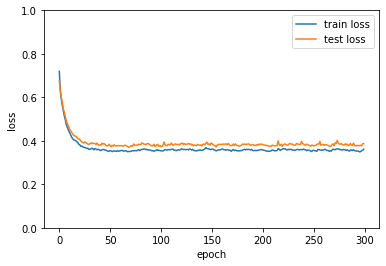

In [47]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy =", max(trainRes.history['val_accuracy']))

# 정확도에는 큰 영향 미치지 않았음.
# 근데 이런식으로도 사용 가능함을 확인할 수 있음. (bias_regularizer = l2(0.01)를 사용함으로써)


In [49]:
# 드롭아웃 해보기!

from sklearn.datasets import load_boston

# 보스턴 데이터 가져오기
boston = load_boston()

boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [50]:
X = boston.data
y = boston.target

print(X)
print(y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0
)

# X, y의 정보를 베이스로 X값들을 가지고 y를 도출할 수 있는 함수를 만들 준비가 완료!
# 데이터만 분리하고 회귀 분석은 하지 않았음

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# train, test 값을 만들어 냄.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
print(scaler)

# with_mean=True, with_std=True : 평균과 표준편차를 가지고 다루는 정보임을 알려 줌.
# 어떤 확률분포를 배우더라도 각 해당 분포의 평균과 표준편차는 항상 정보를 나타냄!

# Z 분포를 베이스로 해서 값을 구해주는 것이 scaler임!! (평균 0, 표준편차 1인 값들로 scaling 된 것!!)

# 여러 확률 분포들이 있을 때 이들의 평균과 표준편차는 다 다름!
# 이를 비교할 수 있는 형태로 만들어주기 위한 것이 scaler임!!!

StandardScaler(copy=True, with_mean=True, with_std=True)


In [57]:
print(X_train)

# 다시~~~
# 값들이 0 근처에 몰려있고,
# 1이상으로 나간 것이 이상치로 보이는 것들! (값이 1이 넘어가는 애들이 있을 수 있음!!!)
# 일반적으로 정규분포에서 다루는 확률은 96% 넘어가는 범위까지는 표준편차를 넘어가지 않는데
# 4% 에서는 ~~
# 적절하게 값들이 섞여 있음!!

[[-0.20735619 -0.49997924  1.54801583 ...  1.2272573   0.42454294
   3.10807269]
 [-0.38886492  0.34677427 -0.58974728 ...  0.05696346  0.40185312
  -0.66643035]
 [-0.33573486 -0.49997924  1.54801583 ...  1.2272573   0.39846135
   0.63936662]
 ...
 [-0.38450355 -0.49997924 -0.15303077 ... -0.30312696  0.39659002
  -0.30284441]
 [-0.37511786 -0.49997924 -0.59690657 ... -0.25811566  0.37588849
   0.89967717]
 [-0.38592298 -0.49997924 -1.00641779 ... -0.84326258  0.42454294
   0.31822262]]


In [58]:
print(X_test)

[[-0.39454262 -0.49997924 -1.12239824 ... -0.70822867  0.17086147
  -0.72160487]
 [ 0.70419882 -0.49997924  1.00534187 ...  0.77714428  0.0648977
  -0.41177872]
 [-0.38890688 -0.49997924  0.4025299  ... -0.93328518  0.38758427
  -0.27454978]
 ...
 [ 1.61285743 -0.49997924  1.00534187 ...  0.77714428  0.42454294
   2.59876943]
 [-0.34350332 -0.49997924 -0.1687812  ... -0.03305915  0.42454294
  -1.11772962]
 [-0.39902507 -0.49997924 -1.27417512 ...  0.10197476  0.39202867
  -1.02294263]]
